In [1]:
# Data source: EEOC, retrieved 2/21/23
# https://www.eeoc.gov/data/charges-alleging-sex-based-harassment-charges-filed-eeoc-fy-2010-fy-2021

# Source for reading HTML tables with Pandas: Practical Business Python, retrieved 8/30/22
# https://pbpython.com/pandas-html-table.html

In [2]:
# Import dependencies (might not be using them all)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize

In [3]:
# Read HTML tables from EEOC website

table_EEOC = pd.read_html(
    "https://www.eeoc.gov/data/charges-alleging-sex-based-harassment-charges-filed-eeoc-fy-2010-fy-2021")

In [4]:
# Check how many tables are on the page

len(table_EEOC)

2

In [5]:
# Get the second table on the page

har_df = table_EEOC[1]

In [6]:
har_df.shape

(22, 13)

In [7]:
har_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,FY 2010,FY 2011,FY 2012,FY 2013,FY 2014,FY 2015,FY 2016,FY 2017,FY 2018,FY 2019,FY 2020,FY 2021
1,Receipts,7944,7809,7571,7256,6862,6822,6758,6696,7609,7514,6587,5581
2,% of Charges Filed By Males,16.2%,16.1%,17.8%,17.6%,17.5%,17.1%,16.6%,16.5%,15.9%,16.8%,16.8%,16.3%
3,Resolutions,8959,9195,8924,7758,7037,7289,7433,7511,7986,7875,7278,6189
4,Resolutions By Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Settlements,995,1039,977,879,786,834,698,662,698,692,760,721
6,NaN,11.1%,11.3%,10.9%,11.3%,11.2%,11.4%,9.4%,8.8%,8.7%,8.8%,10.4%,11.6%
7,Withdrawals w/Benefits,548,523,537,518,526,597,595,588,691,744,807,737
8,NaN,6.1%,5.7%,6.0%,6.7%,7.5%,8.2%,8.0%,7.8%,8.7%,9.4%,11.1%,11.9%
9,Administrative Closures,2086,1962,1892,1763,1637,1690,1701,1623,1666,1785,1654,1484


In [8]:
# Set first row as header

har_df.columns = har_df.iloc[0]

har_df = har_df[1:]

har_df

,NaN,FY 2010,FY 2011,FY 2012,FY 2013,FY 2014,FY 2015,FY 2016,FY 2017,FY 2018,FY 2019,FY 2020,FY 2021
1,Receipts,7944,7809,7571,7256,6862,6822,6758,6696,7609,7514,6587,5581
2,% of Charges Filed By Males,16.2%,16.1%,17.8%,17.6%,17.5%,17.1%,16.6%,16.5%,15.9%,16.8%,16.8%,16.3%
3,Resolutions,8959,9195,8924,7758,7037,7289,7433,7511,7986,7875,7278,6189
4,Resolutions By Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Settlements,995,1039,977,879,786,834,698,662,698,692,760,721
6,NaN,11.1%,11.3%,10.9%,11.3%,11.2%,11.4%,9.4%,8.8%,8.7%,8.8%,10.4%,11.6%
7,Withdrawals w/Benefits,548,523,537,518,526,597,595,588,691,744,807,737
8,NaN,6.1%,5.7%,6.0%,6.7%,7.5%,8.2%,8.0%,7.8%,8.7%,9.4%,11.1%,11.9%
9,Administrative Closures,2086,1962,1892,1763,1637,1690,1701,1623,1666,1785,1654,1484
10,NaN,23.3%,21.3%,21.2%,22.7%,23.3%,23.2%,22.9%,21.6%,20.9%,22.7%,22.7%,24.0%


In [9]:
# Remove rows labeled NaN. These contain percentages that we can calculate ourselves if we need them later.
# I'm doing this because I want to keep my units relatively straightforward

har_clean_df = har_df.dropna(axis=0)

har_clean_df

,NaN,FY 2010,FY 2011,FY 2012,FY 2013,FY 2014,FY 2015,FY 2016,FY 2017,FY 2018,FY 2019,FY 2020,FY 2021
1,Receipts,7944,7809,7571,7256,6862,6822,6758,6696,7609,7514,6587,5581
2,% of Charges Filed By Males,16.2%,16.1%,17.8%,17.6%,17.5%,17.1%,16.6%,16.5%,15.9%,16.8%,16.8%,16.3%
3,Resolutions,8959,9195,8924,7758,7037,7289,7433,7511,7986,7875,7278,6189
5,Settlements,995,1039,977,879,786,834,698,662,698,692,760,721
7,Withdrawals w/Benefits,548,523,537,518,526,597,595,588,691,744,807,737
9,Administrative Closures,2086,1962,1892,1763,1637,1690,1701,1623,1666,1785,1654,1484
11,No Reasonable Cause,4551,4975,4842,4066,3662,3770,4019,4206,4501,4297,3716,2936
13,Reasonable Cause,779,696,676,532,426,398,420,432,430,356,341,311
15,Successful Conciliations,242,238,243,212,152,152,192,146,140,135,131,133
17,Unsuccessful Conciliations,537,458,433,320,274,246,228,286,290,221,210,178


In [10]:
# Get rid of dollar signs from values in Monetary Benefits (millions) row
# Indicate dollar units in row label. 
# Disable Mathjax so Monetary Benefits ($M) will display without weird formatting. 
# Source: https://stackoverflow.com/questions/52550355/how-do-i-get-rid-of-italics-in-ipython-pandas-and-get-plain-text

har_clean_df = har_clean_df.replace("\$", "", 
                                                regex=True)

har_clean_df = har_clean_df.replace("Monetary Benefits \(Millions\)\*", 
                                                "Monetary Benefits ($M)", 
                                                regex=True)

pd.set_option('display.html.use_mathjax', False)

In [11]:
har_clean_df

,NaN,FY 2010,FY 2011,FY 2012,FY 2013,FY 2014,FY 2015,FY 2016,FY 2017,FY 2018,FY 2019,FY 2020,FY 2021
1,Receipts,7944,7809,7571,7256,6862,6822,6758,6696,7609,7514,6587,5581
2,% of Charges Filed By Males,16.2%,16.1%,17.8%,17.6%,17.5%,17.1%,16.6%,16.5%,15.9%,16.8%,16.8%,16.3%
3,Resolutions,8959,9195,8924,7758,7037,7289,7433,7511,7986,7875,7278,6189
5,Settlements,995,1039,977,879,786,834,698,662,698,692,760,721
7,Withdrawals w/Benefits,548,523,537,518,526,597,595,588,691,744,807,737
9,Administrative Closures,2086,1962,1892,1763,1637,1690,1701,1623,1666,1785,1654,1484
11,No Reasonable Cause,4551,4975,4842,4066,3662,3770,4019,4206,4501,4297,3716,2936
13,Reasonable Cause,779,696,676,532,426,398,420,432,430,356,341,311
15,Successful Conciliations,242,238,243,212,152,152,192,146,140,135,131,133
17,Unsuccessful Conciliations,537,458,433,320,274,246,228,286,290,221,210,178


In [12]:
# Remove "FY " from column headers
# Source: https://stackoverflow.com/questions/55679401/remove-prefix-or-suffix-substring-from-column-headers-in-pandas

har_clean_df.columns = har_clean_df.columns.str.strip("FY ")

In [13]:
# Give the column with row labels a meaningful name

har_clean_df.rename(columns = {"nan": "Metric"}, 
          inplace = True)

In [14]:
# Reset the index since we dropped a bunch of rows earlier

har_clean_df = har_clean_df.reset_index(drop=True)

In [15]:
# To do: figure out how to 
# Didn't work: title_vii_clean_df[[1:]] = title_vii_clean_df[[1:]].apply(pd.to_numeric)

In [16]:
har_clean_df

,NaN,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Receipts,7944,7809,7571,7256,6862,6822,6758,6696,7609,7514,6587,5581
1,% of Charges Filed By Males,16.2%,16.1%,17.8%,17.6%,17.5%,17.1%,16.6%,16.5%,15.9%,16.8%,16.8%,16.3%
2,Resolutions,8959,9195,8924,7758,7037,7289,7433,7511,7986,7875,7278,6189
3,Settlements,995,1039,977,879,786,834,698,662,698,692,760,721
4,Withdrawals w/Benefits,548,523,537,518,526,597,595,588,691,744,807,737
5,Administrative Closures,2086,1962,1892,1763,1637,1690,1701,1623,1666,1785,1654,1484
6,No Reasonable Cause,4551,4975,4842,4066,3662,3770,4019,4206,4501,4297,3716,2936
7,Reasonable Cause,779,696,676,532,426,398,420,432,430,356,341,311
8,Successful Conciliations,242,238,243,212,152,152,192,146,140,135,131,133
9,Unsuccessful Conciliations,537,458,433,320,274,246,228,286,290,221,210,178


In [17]:
har_clean_df.columns.values[0] = 'Metric'
har_clean_df.columns

Index(['Metric', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021'],
      dtype='object', name=0)

In [22]:
transpose_har_clean_df = har_clean_df.T

In [23]:
transpose_har_clean_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,,
Metric,Receipts,% of Charges Filed By Males,Resolutions,Settlements,Withdrawals w/Benefits,Administrative Closures,No Reasonable Cause,Reasonable Cause,Successful Conciliations,Unsuccessful Conciliations,Merit Resolutions,Monetary Benefits ($M)
2010,7944,16.2%,8959,995,548,2086,4551,779,242,537,2322,41.2
2011,7809,16.1%,9195,1039,523,1962,4975,696,238,458,2258,45.1
2012,7571,17.8%,8924,977,537,1892,4842,676,243,433,2190,43.0
2013,7256,17.6%,7758,879,518,1763,4066,532,212,320,1929,44.6
2014,6862,17.5%,7037,786,526,1637,3662,426,152,274,1738,35.0
2015,6822,17.1%,7289,834,597,1690,3770,398,152,246,1829,46.0
2016,6758,16.6%,7433,698,595,1701,4019,420,192,228,1713,40.7
2017,6696,16.5%,7511,662,588,1623,4206,432,146,286,1682,46.3


In [24]:
transpose_har_clean_df.columns

RangeIndex(start=0, stop=12, step=1)

In [25]:
transpose_har_clean_df.columns = transpose_har_clean_df.iloc[0]

transpose_har_clean_df = transpose_har_clean_df[1:]

transpose_har_clean_df

Metric,Receipts,% of Charges Filed By Males,Resolutions,Settlements,Withdrawals w/Benefits,Administrative Closures,No Reasonable Cause,Reasonable Cause,Successful Conciliations,Unsuccessful Conciliations,Merit Resolutions,Monetary Benefits ($M)
0,,,,,,,,,,,,
2010,7944,16.2%,8959,995,548,2086,4551,779,242,537,2322,41.2
2011,7809,16.1%,9195,1039,523,1962,4975,696,238,458,2258,45.1
2012,7571,17.8%,8924,977,537,1892,4842,676,243,433,2190,43.0
2013,7256,17.6%,7758,879,518,1763,4066,532,212,320,1929,44.6
2014,6862,17.5%,7037,786,526,1637,3662,426,152,274,1738,35.0
2015,6822,17.1%,7289,834,597,1690,3770,398,152,246,1829,46.0
2016,6758,16.6%,7433,698,595,1701,4019,420,192,228,1713,40.7
2017,6696,16.5%,7511,662,588,1623,4206,432,146,286,1682,46.3
2018,7609,15.9%,7986,698,691,1666,4501,430,140,290,1819,56.6


In [26]:
transpose_har_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2010 to 2021
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Receipts                     12 non-null     object
 1   % of Charges Filed By Males  12 non-null     object
 2   Resolutions                  12 non-null     object
 3   Settlements                  12 non-null     object
 4   Withdrawals w/Benefits       12 non-null     object
 5   Administrative Closures      12 non-null     object
 6   No Reasonable Cause          12 non-null     object
 7   Reasonable Cause             12 non-null     object
 8   Successful Conciliations     12 non-null     object
 9   Unsuccessful Conciliations   12 non-null     object
 10  Merit Resolutions            12 non-null     object
 11  Monetary Benefits ($M)       12 non-null     object
dtypes: object(12)
memory usage: 1.2+ KB


In [28]:
transpose_har_clean_df['% of Charges Filed By Males'] = transpose_har_clean_df['% of Charges Filed By Males'].str.replace('%', '')

C:\Users\kdard\AppData\Local\Temp\ipykernel_18620\347183155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transpose_har_clean_df['% of Charges Filed By Males'] = transpose_har_clean_df['% of Charges Filed By Males'].str.replace('%', '')


In [29]:
transpose_har_clean_df

Metric,Receipts,% of Charges Filed By Males,Resolutions,Settlements,Withdrawals w/Benefits,Administrative Closures,No Reasonable Cause,Reasonable Cause,Successful Conciliations,Unsuccessful Conciliations,Merit Resolutions,Monetary Benefits ($M)
0,,,,,,,,,,,,
2010,7944,16.2,8959,995,548,2086,4551,779,242,537,2322,41.2
2011,7809,16.1,9195,1039,523,1962,4975,696,238,458,2258,45.1
2012,7571,17.8,8924,977,537,1892,4842,676,243,433,2190,43.0
2013,7256,17.6,7758,879,518,1763,4066,532,212,320,1929,44.6
2014,6862,17.5,7037,786,526,1637,3662,426,152,274,1738,35.0
2015,6822,17.1,7289,834,597,1690,3770,398,152,246,1829,46.0
2016,6758,16.6,7433,698,595,1701,4019,420,192,228,1713,40.7
2017,6696,16.5,7511,662,588,1623,4206,432,146,286,1682,46.3
2018,7609,15.9,7986,698,691,1666,4501,430,140,290,1819,56.6


In [30]:
# Convert all data to numeric data types 

transpose_har_clean_df = transpose_har_clean_df.apply(pd.to_numeric)

In [31]:
transpose_har_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2010 to 2021
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Receipts                     12 non-null     int64  
 1   % of Charges Filed By Males  12 non-null     float64
 2   Resolutions                  12 non-null     int64  
 3   Settlements                  12 non-null     int64  
 4   Withdrawals w/Benefits       12 non-null     int64  
 5   Administrative Closures      12 non-null     int64  
 6   No Reasonable Cause          12 non-null     int64  
 7   Reasonable Cause             12 non-null     int64  
 8   Successful Conciliations     12 non-null     int64  
 9   Unsuccessful Conciliations   12 non-null     int64  
 10  Merit Resolutions            12 non-null     int64  
 11  Monetary Benefits ($M)       12 non-null     float64
dtypes: float64(2), int64(10)
memory usage: 1.2+ KB


In [34]:
transpose_har_clean_df

Metric,Receipts,% of Charges Filed By Males,Resolutions,Settlements,Withdrawals w/Benefits,Administrative Closures,No Reasonable Cause,Reasonable Cause,Successful Conciliations,Unsuccessful Conciliations,Merit Resolutions,Monetary Benefits ($M)
0,,,,,,,,,,,,
2010,7944,16.2,8959,995,548,2086,4551,779,242,537,2322,41.2
2011,7809,16.1,9195,1039,523,1962,4975,696,238,458,2258,45.1
2012,7571,17.8,8924,977,537,1892,4842,676,243,433,2190,43.0
2013,7256,17.6,7758,879,518,1763,4066,532,212,320,1929,44.6
2014,6862,17.5,7037,786,526,1637,3662,426,152,274,1738,35.0
2015,6822,17.1,7289,834,597,1690,3770,398,152,246,1829,46.0
2016,6758,16.6,7433,698,595,1701,4019,420,192,228,1713,40.7
2017,6696,16.5,7511,662,588,1623,4206,432,146,286,1682,46.3
2018,7609,15.9,7986,698,691,1666,4501,430,140,290,1819,56.6


In [35]:
transpose_har_clean_df['No. of charges filed by males'] = transpose_har_clean_df['Receipts'] * transpose_har_clean_df['% of Charges Filed By Males']/100

In [36]:
transpose_har_clean_df

Metric,Receipts,% of Charges Filed By Males,Resolutions,Settlements,Withdrawals w/Benefits,Administrative Closures,No Reasonable Cause,Reasonable Cause,Successful Conciliations,Unsuccessful Conciliations,Merit Resolutions,Monetary Benefits ($M),No. of charges filed by males
0,,,,,,,,,,,,,
2010,7944,16.2,8959,995,548,2086,4551,779,242,537,2322,41.2,1286.928
2011,7809,16.1,9195,1039,523,1962,4975,696,238,458,2258,45.1,1257.249
2012,7571,17.8,8924,977,537,1892,4842,676,243,433,2190,43.0,1347.638
2013,7256,17.6,7758,879,518,1763,4066,532,212,320,1929,44.6,1277.056
2014,6862,17.5,7037,786,526,1637,3662,426,152,274,1738,35.0,1200.850
2015,6822,17.1,7289,834,597,1690,3770,398,152,246,1829,46.0,1166.562
2016,6758,16.6,7433,698,595,1701,4019,420,192,228,1713,40.7,1121.828
2017,6696,16.5,7511,662,588,1623,4206,432,146,286,1682,46.3,1104.840
2018,7609,15.9,7986,698,691,1666,4501,430,140,290,1819,56.6,1209.831


In [42]:
graph_df = transpose_har_clean_df[['Receipts', 'No. of charges filed by males']]

graph_df['No. of charges not filed by males'] = graph_df['Receipts'] - graph_df['No. of charges filed by males']

graph_df

C:\Users\kdard\AppData\Local\Temp\ipykernel_18620\431158909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['No. of charges not filed by males'] = graph_df['Receipts'] - graph_df['No. of charges filed by males']


Metric,Receipts,No. of charges filed by males,No. of charges not filed by males
0,,,
2010,7944,1286.928,6657.072
2011,7809,1257.249,6551.751
2012,7571,1347.638,6223.362
2013,7256,1277.056,5978.944
2014,6862,1200.850,5661.150
2015,6822,1166.562,5655.438
2016,6758,1121.828,5636.172
2017,6696,1104.840,5591.160
2018,7609,1209.831,6399.169


In [43]:
graph_df['Year'] = graph_df.index
graph_df

C:\Users\kdard\AppData\Local\Temp\ipykernel_18620\783843751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['Year'] = graph_df.index


Metric,Receipts,No. of charges filed by males,No. of charges not filed by males,Year
0,,,,
2010,7944,1286.928,6657.072,2010
2011,7809,1257.249,6551.751,2011
2012,7571,1347.638,6223.362,2012
2013,7256,1277.056,5978.944,2013
2014,6862,1200.850,5661.150,2014
2015,6822,1166.562,5655.438,2015
2016,6758,1121.828,5636.172,2016
2017,6696,1104.840,5591.160,2017
2018,7609,1209.831,6399.169,2018


In [46]:
graph_df = graph_df.drop(['Receipts'], axis=1)

In [47]:
graph_df

Metric,No. of charges filed by males,No. of charges not filed by males,Year
0,,,
2010,1286.928,6657.072,2010
2011,1257.249,6551.751,2011
2012,1347.638,6223.362,2012
2013,1277.056,5978.944,2013
2014,1200.850,5661.150,2014
2015,1166.562,5655.438,2015
2016,1121.828,5636.172,2016
2017,1104.840,5591.160,2017
2018,1209.831,6399.169,2018


<AxesSubplot:title={'center':'Test'}, xlabel='Year'>

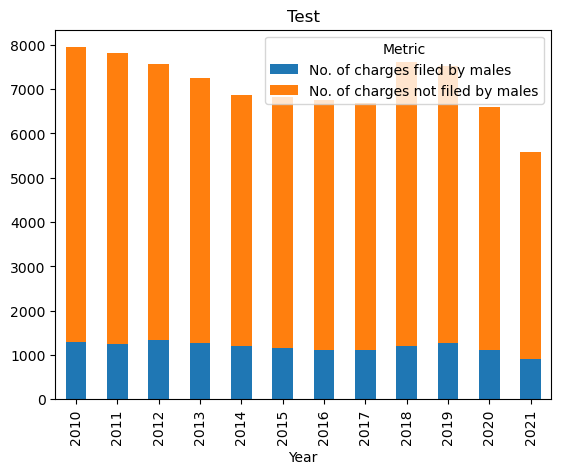

In [48]:
graph_df.plot.bar(x='Year', stacked=True, title='Test')

In [50]:
transpose_har_clean_df['% of Charges Not Filed By Males'] = 100 - transpose_har_clean_df['% of Charges Filed By Males']
transpose_har_clean_df

Metric,Receipts,% of Charges Filed By Males,Resolutions,Settlements,Withdrawals w/Benefits,Administrative Closures,No Reasonable Cause,Reasonable Cause,Successful Conciliations,Unsuccessful Conciliations,Merit Resolutions,Monetary Benefits ($M),No. of charges filed by males,% of Charges Not Filed By Males
0,,,,,,,,,,,,,,
2010,7944,16.2,8959,995,548,2086,4551,779,242,537,2322,41.2,1286.928,83.8
2011,7809,16.1,9195,1039,523,1962,4975,696,238,458,2258,45.1,1257.249,83.9
2012,7571,17.8,8924,977,537,1892,4842,676,243,433,2190,43.0,1347.638,82.2
2013,7256,17.6,7758,879,518,1763,4066,532,212,320,1929,44.6,1277.056,82.4
2014,6862,17.5,7037,786,526,1637,3662,426,152,274,1738,35.0,1200.850,82.5
2015,6822,17.1,7289,834,597,1690,3770,398,152,246,1829,46.0,1166.562,82.9
2016,6758,16.6,7433,698,595,1701,4019,420,192,228,1713,40.7,1121.828,83.4
2017,6696,16.5,7511,662,588,1623,4206,432,146,286,1682,46.3,1104.840,83.5
2018,7609,15.9,7986,698,691,1666,4501,430,140,290,1819,56.6,1209.831,84.1


In [53]:
perc_graph_df = transpose_har_clean_df[['% of Charges Filed By Males', '% of Charges Not Filed By Males']]
perc_graph_df

Metric,% of Charges Filed By Males,% of Charges Not Filed By Males
0,,
2010,16.2,83.8
2011,16.1,83.9
2012,17.8,82.2
2013,17.6,82.4
2014,17.5,82.5
2015,17.1,82.9
2016,16.6,83.4
2017,16.5,83.5
2018,15.9,84.1


In [54]:
perc_graph_df['Year'] = perc_graph_df.index

perc_graph_df

C:\Users\kdard\AppData\Local\Temp\ipykernel_18620\3461055620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perc_graph_df['Year'] = perc_graph_df.index


Metric,% of Charges Filed By Males,% of Charges Not Filed By Males,Year
0,,,
2010,16.2,83.8,2010
2011,16.1,83.9,2011
2012,17.8,82.2,2012
2013,17.6,82.4,2013
2014,17.5,82.5,2014
2015,17.1,82.9,2015
2016,16.6,83.4,2016
2017,16.5,83.5,2017
2018,15.9,84.1,2018


Text(0, -0.1, '* The EEOC specifies the percentage of charges filed by "males" but does not specify the gender of the remaining complainants.')

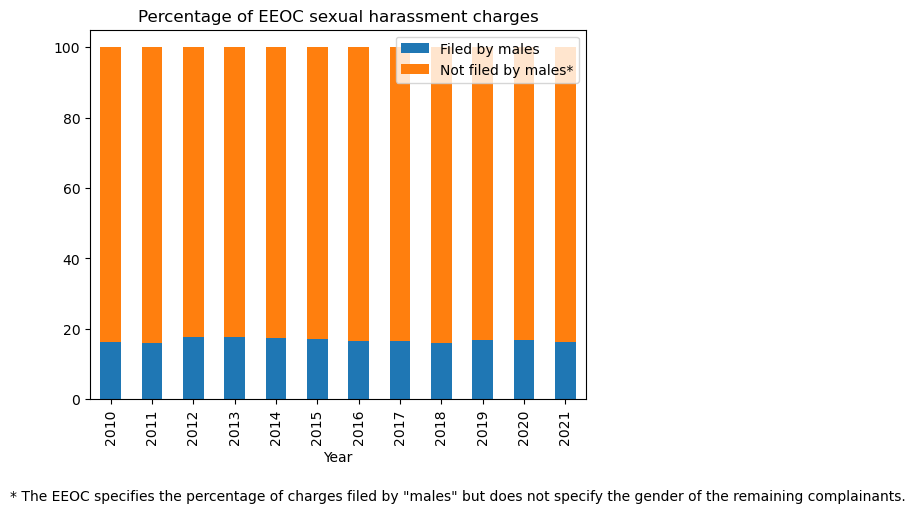

In [65]:
perc_graph_df.plot.bar(
    x='Year', 
    stacked=True, 
    title='Percentage of EEOC sexual harassment charges')

plt.legend(["Filed by males", "Not filed by males*"], loc='upper right')

plt.figtext(0, -.1, "* The EEOC specifies the percentage of charges filed by \"males\" but does not specify the gender of the remaining complainants.")

In [ ]:
# har_clean_df.to_csv('EEOC_sex-based_harassment_2010-2021.csv')